Task 2 (To be finished)

In [ ]:
import numpy as np
from qiskit_aer import AerSimulator, Aer
from qiskit.circuit.library import StatePreparation
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Given list of integers
L = [1,2,2,4,5,6,7,11,17,21,22,23]
print("length:", len(L))
# Determine the number of qubits needed
num_idx_qubits = int(np.ceil(np.log2(len(L))))
num_encode_qubits = int(np.log2(max(L))) + 1
num_qubits = num_idx_qubits + num_encode_qubits
print("num_qubits", num_qubits)
print("number of index qubits", num_idx_qubits)
print("number of basis-encoding qubits", num_encode_qubits)
# Initialize the state vector
statevector = np.zeros(2**num_qubits)

# Prepare the state vector
for i, el in enumerate(L):

    element_reg = '{0:b}'.format(el).zfill(num_encode_qubits) # first 
    index_reg = '{0:b}'.format(i).zfill(num_idx_qubits) # last
    
    statevector[int(element_reg + index_reg, 2)] = 1

statevector /= np.linalg.norm(statevector)

# Create a quantum circuit
qc = QuantumCircuit(num_qubits)
sp = StatePreparation(statevector)
qc.append(sp, range(num_qubits))

qc.measure_all()

simulator = Aer.get_backend("aer_simulator")

circuit_transpiled = transpile(qc, backend = simulator)
result = simulator.run(circuit_transpiled, shots = 10000).result()
print(result)
counts_ideal = result.get_counts()
print(counts_ideal)
# plot_histogram(counts_ideal)
"""
prepare the state of qubits
the first num_encode_qubits of qubits will represent the number,
the last num_idx_qubits of qubits will represent the index

when we act on the qubits, we only change the first num_encode_qubits of qubits
"""
decimal_results = {}
for key, value in counts_ideal.items():
    print("counts",value)
    index = int(key[num_idx_qubits + 1:],2) ## the last num_idx_qubits number of qubits
    print(key[num_encode_qubits:] , " : ", index)
    number = int(key[:num_encode_qubits],2) ## the first num_encode_qubits number of qubits
    print(key[:num_encode_qubits] , " : ", number)
    
    decimal_results[(index , number, key[:num_encode_qubits])] = value
print(decimal_results)
# # Plot the histogram

from collections import defaultdict
L_dict = defaultdict(int)
for i,elem in enumerate([1,2,2,4,5,6,7,11,17,21,22,23]):
    L_dict[i] = elem
print(L_dict)
plot_histogram(decimal_results)

next problem: how to detect if a state is odd or not?
if odd --> flip qubits to change that number to even

odd number in binary ends with 1

so we would need to perform a bit flip whenever we see a 1 at the last qubit

edge case: 1 --> |00001> if flip turns to |00000> = 0, which we dont want

so for 1 --> |00001> -> |00010> 

problem is: how do we detect? we know that for |00001>, every thing is 0 except the first digit

maybe we can flip every qubit s.t. |00001> -> |11110> = 30

Given the example input, we can as 30 < n = 31

However in this implementation, we need 4 + 5 = 9 qubits, we only can use 5 qubits, since 
```
total_qubits = int(np.ceil(np.log2(31))) ## 5
``` 
#### encoding amplitudes as index?
In the above approach, we use the qubits to encode both the index of the original array and its number.

There is another way: we encode only the integer number to the qubits, and we order them by ascending probability
i.e. L[0] will have the least probability, L[-1] will have the largest probability

how can we encode the amplitudes? Remember in quantum mechanics, amplitudes and phases are linked

not sure how to resolve duplicate elements
##### flipping bits
we can first force every state to end with a |1> state, then apply an X gate to that s.t. |1> -> |0>


length: 12
num_qubits 5
Result(backend_name='aer_simulator', backend_version='0.13.3', qobj_id='', job_id='0d973037-227b-4ccb-a22f-3b419379eaed', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0xb': 897, '0x2': 927, '0x17': 944, '0x6': 868, '0x4': 929, '0x15': 923, '0x1': 907, '0x16': 851, '0x5': 956, '0x11': 922, '0x7': 876}), header=QobjExperimentHeader(creg_sizes=[['meas', 5]], global_phase=0.0, memory_slots=5, n_qubits=5, name='circuit-16807', qreg_sizes=[['q', 5]], metadata={}), status=DONE, seed_simulator=64409184, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 5, 'num_clbits': 5, 'time_taken': 0.0250347, 'sample_measure_time': 0.0072369, 'input_qubit_map': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]], 'max_memory_mb': 16158, 'measure_sampling': True, 'noise': 'ideal', 'p

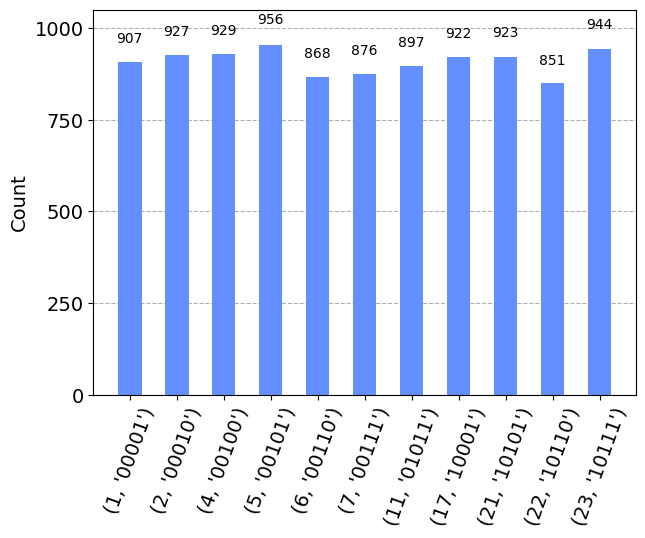

In [19]:
import numpy as np
from qiskit_aer import AerSimulator, Aer
from qiskit.circuit.library import StatePreparation
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Given list of integers
k = 31
L = [1,2,2,4,5,6,7,11,17,21,22,23]
print("length:", len(L))
# Determine the number of qubits needed

num_qubits = int(np.ceil(np.log2(k)))
print("num_qubits", num_qubits)
# Initialize the state vector
statevector = np.zeros(2**num_qubits)

# Prepare the state vector
for i, el in enumerate(L):

    element_reg = '{0:b}'.format(el).zfill(num_qubits)      
    statevector[int(element_reg, 2)] = 1

statevector /= np.linalg.norm(statevector)

# Create a quantum circuit
qc = QuantumCircuit(num_qubits)
sp = StatePreparation(statevector)
qc.append(sp, range(num_qubits))
qc.barrier()

num_elem = len(L)
total_prob = sum(range(len(L) + 1))

# for qubit_index in range(num_qubits):
#     angle = (qubit_index + 1) / num_qubits
#     qc.ry(angle, qubit_index)

qc.measure_all()

simulator = Aer.get_backend("aer_simulator")

circuit_transpiled = transpile(qc, backend = simulator)
result = simulator.run(circuit_transpiled, shots = 10000).result()
print(result)
counts_ideal = result.get_counts()
print(counts_ideal)
# plot_histogram(counts_ideal)

decimal_results = {}
for key, value in counts_ideal.items():
    print("counts",value)
    number = int(key,2) ## the first num_encode_qubits number of qubits
    print(key , " : ", number)
    
    decimal_results[(number, key)] = value
print(decimal_results)

plot_histogram(decimal_results)

Another thought: Store as follows:

index_qubits: int(np.ceil(np.log2(len(L))))

num_qubits - num_index_qubits = num_encode_qubits

we need to transform the number into binary representation first, but we need to store 2 things:
1. the last indices --> to be encoded to the num_encode_qubits
2. the remaining indicies --> to be stored classically in a hashmap

for the quantum circuit, the aim is to get the first digit to be 0.
we can try the following:

- |00> --> |00>
- |10> --> |10>
- |01> --> |10>
- |11> --> |10>

so the workflow will be something like this:
- encode qubits
1. the last indices --> to be encoded to the num_encode_qubits
2. the remaining indicies --> to be stored classically in a hashmap
- apply quantum circuit --> switch all 1 --> 0
- extract info from quantum circuit
- join the info from hashmap AND quantum circuit by index 

length: 12
num_qubits 9
number of index qubits 4
number of basis-encoding qubits 5
Result(backend_name='aer_simulator', backend_version='0.13.3', qobj_id='', job_id='6a73eea0-f425-448a-a935-cc3b053e0197', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x10': 783, '0x54': 775, '0x21': 825, '0x159': 895, '0xb7': 839, '0x76': 834, '0x43': 854, '0x16a': 811, '0x118': 805, '0x17b': 848, '0x65': 845, '0x22': 886}), header=QobjExperimentHeader(creg_sizes=[['meas', 9]], global_phase=0.0, memory_slots=9, n_qubits=9, name='circuit-13762', qreg_sizes=[['q', 9]], metadata={}), status=DONE, seed_simulator=3371171171, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 9, 'num_clbits': 9, 'time_taken': 0.0389178, 'sample_measure_time': 0.009038, 'input_qubit_map': [[0, 0], [1, 1],

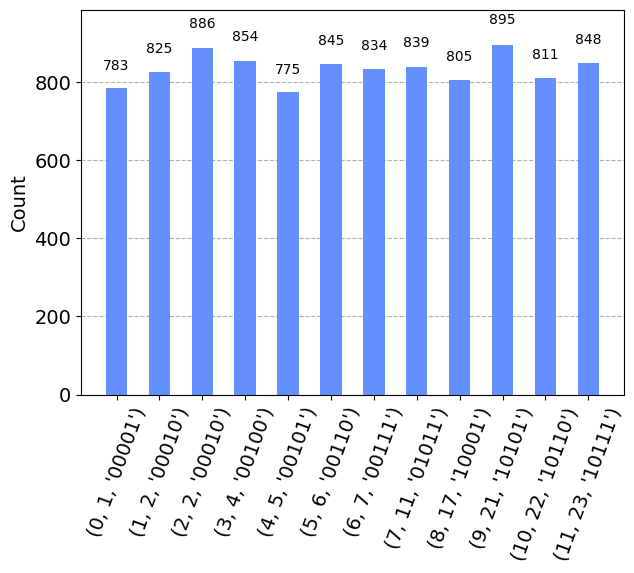

In [18]:
import numpy as np
from qiskit_aer import AerSimulator, Aer
from qiskit.circuit.library import StatePreparation
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Given list of integers
L = [1,2,2,4,5,6,7,11,17,21,22,23]
print("length:", len(L))
# Determine the number of qubits needed
num_idx_qubits = int(np.ceil(np.log2(len(L))))
num_encode_qubits = int(np.log2(max(L))) + 1
num_qubits = num_idx_qubits + num_encode_qubits
print("num_qubits", num_qubits)
print("number of index qubits", num_idx_qubits)
print("number of basis-encoding qubits", num_encode_qubits)
# Initialize the state vector
statevector = np.zeros(2**num_qubits)

# Prepare the state vector
for i, elem in enumerate(L):

    element_reg = '{0:b}'.format(elem).zfill(num_encode_qubits) # first 
    index_reg = '{0:b}'.format(i).zfill(num_idx_qubits) # last
    
    statevector[int(element_reg + index_reg, 2)] = 1

statevector /= np.linalg.norm(statevector)

# Create a quantum circuit
qc = QuantumCircuit(num_qubits)
sp = StatePreparation(statevector)
qc.append(sp, range(num_qubits))

qc.measure_all()

simulator = Aer.get_backend("aer_simulator")

circuit_transpiled = transpile(qc, backend = simulator)
result = simulator.run(circuit_transpiled, shots = 10000).result()
print(result)
counts_ideal = result.get_counts()
print(counts_ideal)
# plot_histogram(counts_ideal)
"""
prepare the state of qubits
the first num_encode_qubits of qubits will represent the number,
the last num_idx_qubits of qubits will represent the index

when we act on the qubits, we only change the first num_encode_qubits of qubits
"""
decimal_results = {}
for key, value in counts_ideal.items():
    print("counts",value)
    index = int(key[num_idx_qubits + 1:],2) ## the last num_idx_qubits number of qubits
    print(key[num_encode_qubits:] , " : ", index)
    number = int(key[:num_encode_qubits],2) ## the first num_encode_qubits number of qubits
    print(key[:num_encode_qubits] , " : ", number)
    
    decimal_results[(index , number, key[:num_encode_qubits])] = value
print(decimal_results)
# # Plot the histogram

from collections import defaultdict
L_dict = defaultdict(int)
for i,elem in enumerate([1,2,2,4,5,6,7,11,17,21,22,23]):
    L_dict[i] = elem
print(L_dict)
plot_histogram(decimal_results)